In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the data into a dataframe using pandas
data123 = pd.read_csv("Twitter.data", header=None)

In [3]:
# making a copy of data to avoid loading data from file
data = data123.copy()
# displaying columns and first few rows of the dataset
print(data.columns)
data.head()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
           dtype='int64')


,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [4]:
# As the appropriate column names are missing from the dataset, assigning appropriate column names to the dataset


collist = ['NCD','AI','AS(NA)','BL','NAC','AS(NAC)','CS','AT','NA','ADL','NAD']
i = 0
for j in range(len(collist)):
    for k in range(7):
        data.rename(columns={i:collist[j]+str('_')+str(k)}, inplace = True)
        i = i+1
        if(i > len(data.columns)-1):
            break
print(len(data.columns))
data.head()

78


,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [5]:
#Analyzing basic attributes of each column of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

The results of data.info gave us an important piece of information that there are no missing values or null values present in any of the columns and hence in the whole dataset. It also tell us that all the columns in the dataset are of either type int or float.

With this information, we move ahead with describing the dataset and then creating the feature and target datasets.

In [6]:
# Displaying analytics of numerical columns 
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,77
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [7]:
# Creating Feature and Target datasets from the original dataset
X = data.drop(columns =[77])
y = data.iloc[:,[77]]
y= pd.DataFrame(y)
X.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,1.0,0,2,0,0,1,1,1
1,2,1,0,0,0,0,4,2,1,0,...,0.0,0.0,1.0,2,1,0,0,0,0,4
2,1,0,0,0,0,4,1,1,0,0,...,0.0,1.0,1.0,1,0,0,0,0,4,1
3,1,0,0,1,0,0,1,1,0,0,...,0.0,0.0,1.0,1,0,0,1,0,0,1
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,1.0,0,1,0,0,1,2,3


In [8]:
#Giving an appropriate column name to the target dataset
y.rename(columns = {77:'Predicted Buzz'}, inplace = 'True')
y.head()

,Predicted Buzz
0,0.0
1,0.5
2,0.0
3,2.5
4,0.5


Data Split - In the below step we are going to create a smaller subset of data which we are going to use for the selection of best model.

In [12]:
#Creating a smaller dataset which we are going to use to decide the best model for our original dataset 
from sklearn.model_selection import train_test_split

X_train_org1, XS, y_train1, ys = train_test_split(X, y, shuffle = True, test_size = 0.1)

#where,  X= dataframe containing features

#y= dataframe containing the target variable

In [16]:
#Checking dimension of the smaller data set that is going to be used for model selection
print(XS.shape)
print(ys.shape)

(58325, 77)
(58325, 1)


In the below step we are going to stadardize/normalize the features by using **StandardScaler** function. As the 
StandardScaler function divides each column value by its standard deviation before subtracting it from the mean,
it makes the outliers come a little closer to the mean than they were before the standardization. As the regression are
in general very sensitive to outliers, this standardization method is expected to work better for regression models. 

In [17]:
#Splitting the sample data and scaling it using standard scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train_org, X_test_org, y_train, y_test = train_test_split(XS,ys, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [18]:
#Checking the dimension of training dataset that was obtained after splitting the sample dataset
print(X_train.shape)
print(y_train.shape)

(43743, 77)
(43743, 1)


In the below few steps we are going to define few functions that we are going to use for certain models respectively.
These functions are basically going to run and fit the grid search on train and test data sets and show us the corresponding results. It is also going to plot these results on a graph(s) which is going to be our tool for deciding the best hyperparameters or combination of hyperparameters for best model selection.

In [ ]:
#Defining a function that is going to perform gridsearch on the knn and polynomial regression models. This function is 
#going to calculate the training and test r-square value for different hyperparameter(s) or combination of different 
#hyperparameters.It will then plot these different values for our analysis to choose the hyperparameter value or 
#combination of values that gives the most optimum performance with regards to both train and test data results.

def evalknnpol(regressor,degree,parameters,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    scoresum = []
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train)
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    #grid_train.grid_scores_
    
    train_score = grid_train.cv_results_['mean_test_score']
    for i in range(degree-1):
        #print(i)
        print("The mean of R2 value for degree "+str(i+1)+" for cv = "+ str(cv)+" : "+ str(train_score[i]))
        #print(train_score)
    
    #type(train_score
    
    #scoresum.append(grid_train.grid_scores_)
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_test = grid_search.fit(X_test, y_test)
    t1 = time.time()
    print('\n')
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the test set is as below")
    print('\n')
    #test_score = grid_test.grid_scores_
    test_score = grid_test.cv_results_['mean_test_score']
    for i in range(degree-1):
        #print(i)
        print("The mean of R2 value for degree "+str(i)+" for cv = "+ str(cv)+" : "+ str(test_score[i]))
        #print(train_score)
        #print(test_score)
    
    #scoresum.append(grid_test.grid_scores_)
    
    print('\n')
    print('Graph Evaluation:')
    param = list(parameters.keys())
    #print(deg)
    x_axis = range(1,degree)
    #%matplotlib inline
    plt.plot(x_axis, train_score, c = 'g', label = 'Train Score')
    plt.plot(x_axis, test_score, c = 'b', label = 'Test Score')
    plt.legend()
    plt.xlabel(param[0])
    plt.ylabel('RSquare')
    
    #print('Train score:'+ str(scoresum[0]))
    #print('Test score:' + str(scoresum[1]))

    return;

In [20]:
#Defining a function that is going to perform gridsearch on the ridge and lasso regression models. This function is 
#going to calculate the training and test r-square value for different hyperparameter(s) or combination of different 
#hyperparameters.It will then plot these different values for our analysis to choose the hyperparameter value or 
#combination of values that gives the most optimum performance with regards to both train and test data sets.

def evalridlas(regressor,parameters,lenpar,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    #scoresum = []
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train)
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    #grid_train.grid_scores_
    
    train_score = grid_train.cv_results_['mean_test_score']
    #print(grid_train.grid_scores_)
    print(train_score)
    
    print('\n')
    for i in (parameters):
        for j in range(lenpar):
            #print(parameters[i][j])
            print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(train_score[j]))
            #print(train_score)
    
    #type(train_score
    
    #scoresum.append(grid_train.grid_scores_)
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_test = grid_search.fit(X_test, y_test)
    t1 = time.time()
    print('\n')
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the test set is as below")
    #print(grid_test.grid_scores_)
    print('\n')
    #test_score = grid_test.grid_scores_
    test_score = grid_test.cv_results_['mean_test_score']
    print(test_score)
    #print(grid_test.grid_scores_)
    print('\n')
    for i in (parameters):
        for j in range(lenpar):
            #print(parameters[i][j])
            print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(test_score[j]))
            #print(train_score)
    
    #scoresum.append(grid_test.grid_scores_)
    
    #key1 = parameters.keys()
    
    #print(deg)
    #x_axis = range(1,degree)
    #%matplotlib inline
    print('\n')
    print('Graph Evaluation:')
    
    plt.plot(parameters['alpha'], train_score, c = 'g', label = 'Train Score')
    plt.plot(parameters['alpha'], test_score, c = 'b', label = 'Test Score')
    plt.legend()
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('RSquared')
    
    #print('Train score:'+ str(scoresum[0]))
    #print('Test score:' + str(scoresum[1]))

    return;

In [21]:
#Defining a function that is going to perform gridsearch on the linearsvm and svm with linear kernel regression models. 
#This function is going to calculate the training and test r-square value for different hyperparameter(s) or 
#combination of different hyperparameters.It will then plot these different values for our analysis to choose 
#the hyperparameter value or combination of values that gives the most optimum performance with regards to both train 
#and test data sets.

def evalsvmlin(regressor,parameters,lenpar,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    #scoresum = []
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    #print('\n')
    #grid_train.grid_scores_
    train_score = grid_train.cv_results_['mean_test_score']
    #print(grid_train.grid_scores_)
    #print('\n')
    for i in (parameters):
        for j in range(lenpar):
            #print(parameters[i][j])
            print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(train_score[j]))
            #print(train_score)
    
    #type(train_score
    
    #scoresum.append(grid_train.grid_scores_)
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    #grid_search.fit(X_train, y_train.values.reshape((-1,)))
    grid_test = grid_search.fit(X_test, y_test.values.reshape((-1,)))
    t1 = time.time()
    print('\n')
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the test set is as below")
    #print(grid_test.grid_scores_)
    #print('\n')
    #test_score = grid_test.grid_scores_
    test_score = grid_test.cv_results_['mean_test_score']
    #print(grid_test.grid_scores_)
    #print('\n')
    #print("Graph Evaluation")
    for i in (parameters):
        for j in range(lenpar):
            #print(parameters[i][j])
            print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(test_score[j]))
            #print(train_score)
    
    #scoresum.append(grid_test.grid_scores_)
    
    #key1 = parameters.keys()
    print('\n')
    print('Graph Evaluation:')
    
    #print(deg)
    #x_axis = range(1,degree)
    #%matplotlib inline
    for k in parameters.keys():
        
        plt.plot(parameters[k], train_score, c = 'g', label = 'Train Score')
        plt.plot(parameters[k], test_score, c = 'b', label = 'Test Score')
        plt.legend()
        plt.xscale('log')
        plt.xlabel('C')
        plt.ylabel('RSquared')
    
    #print('Train score:'+ str(scoresum[0]))
    #print('Test score:' + str(scoresum[1]))

    return;

In [22]:
#Defining a function that is going to perform gridsearch on the svm with linear and polynomial kernel regression models. 
#This function is going to calculate the training and test r-square value for different hyperparameter(s) or 
#combination of different hyperparameters.It will then plot these different values for our analysis to choose 
#the hyperparameter value or combination of values that gives the most optimum performance with regards to both train 
#and test data sets.

def evalsvmpolker(regressor,parameters,lenpar,cross,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    #scoresum = []
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    #X_train, y_train = sm.fit_sample(X_train1, y_train1.values.reshape((-1,)))
    grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    #grid_train.grid_scores_
    
    train_score = grid_train.cv_results_['mean_test_score']
    print(train_score)
    #print(grid_train.grid_scores_)
    
    #print('\n')
    #for i in (parameters):
        #for j in range(lenpar):
            #print(parameters[i][j])
            #print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(train_score[j]))
            #print(train_score)
    
    #type(train_score
    
    #scoresum.append(grid_train.grid_scores_)
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    #grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
    grid_test = grid_search.fit(X_test, y_test.values.reshape((-1,)))
    t1 = time.time()
    print('\n')
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the test set is as below")
    #print(grid_test.grid_scores_)
    print('\n')
    #test_score = grid_test.grid_scores_
    test_score = grid_test.cv_results_['mean_test_score']
    print(test_score)
    #print(grid_test.grid_scores_)
    print('\n')
    print("Graph Evaluation:")
    #for i in (parameters):
        #for j in range(cross):
            #print(parameters[i][j])
            #print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(test_score[j]))
            #print(train_score)
    
    #scoresum.append(grid_test.grid_scores_)
    
    #key1 = parameters.keys()
    
    #print(deg)
    #x_axis = range(1,degree)
    #%matplotlib inline
    #print(len(train_score))
    a = []
    param = list(parameters.keys())
    #parameters[param[0]]
    for i in range(cross):
        t = grid_train.cv_results_['params'][i]
        a.append(str(t[param[0]])+str('|')+str(t[param[1]]))
    #print(a)
    len(a)
    plt.figure(figsize = (25,10))
    plt.scatter(a, train_score, c = 'g', label = 'Train Score')
    plt.scatter(a, test_score, c = 'b', label = 'Test Score')
    plt.legend()
    #plt.xscale('log')
    plt.xlabel(param[0]+ str('|')+param[1])
    plt.ylabel('RSquared')
    
    #print('Train score:'+ str(scoresum[0]))
    #print('Test score:' + str(scoresum[1]))

    return;

## Evaluation Method

1. We have used Rsquare as a parameter to assess the goodness of fit to compare different regression models. We chose it because it tells us how well our model fits the data points and it is easy to infer since the value ranges form 0 to 1. It is also faster to calculate.

2. We Analyzed the graph returned by our functions that shows us the respective train and test scores of R-square for different hyperparameters or a combination of hypermeters. We chose the best hypermeter/combination based on its performance not only on the train dataset,but also on test dataset. we chose the one that showed high R-square value on both train and test dataset.

## Linear Regression Model:

In [23]:
#Running Linear regression model on the training dataset split from the sample dataset
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("The value of Rsquare for linear regression on training dataset is: "+ str(regressor.score(X_train, y_train)))
print("The value of Rsquare for linear regression on test dataset is: "+ str(regressor.score(X_test, y_test)))

The value of Rsquare for linear regression on training dataset is: 0.9609955944791111
The value of Rsquare for linear regression on test dataset is: 0.7743549752237955


## Evaluation Remarks on Linear Regression
Linear Regression model gave us the value of Rsquare as **95.09%** for training set and **77.43%** for the test dataset. Although the train test score appears to be good , the test scores were not as good as the train square. 
But we are going to compare it with other machine learning models and see how the other models perform as compared
to Linear Regression model.

## Knn-Regression Model

Grid Search Took 1013.32 seconds, The results of the grid search on the train set is as below


The mean of R2 value for degree 1 for cv = 5 : 0.8465783713564337
The mean of R2 value for degree 2 for cv = 5 : 0.8843509354752604
The mean of R2 value for degree 3 for cv = 5 : 0.8810117656482114
The mean of R2 value for degree 4 for cv = 5 : 0.8856325243636307
The mean of R2 value for degree 5 for cv = 5 : 0.8823876475936647
The mean of R2 value for degree 6 for cv = 5 : 0.8810887458789665
The mean of R2 value for degree 7 for cv = 5 : 0.8727251290682361
The mean of R2 value for degree 8 for cv = 5 : 0.8705692373149484
The mean of R2 value for degree 9 for cv = 5 : 0.866275207602502


Grid Search Took 130.89 seconds, The results of the grid search on the test set is as below


The mean of R2 value for degree 0 for cv = 5 : 0.7791716818712746
The mean of R2 value for degree 1 for cv = 5 : 0.7846812924753667
The mean of R2 value for degree 2 for cv = 5 : 0.7862545458178004
The mean of R2 va

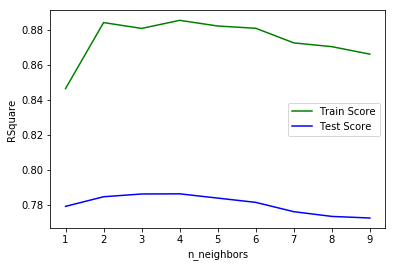

In [24]:
#Running the knn regression model on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results on train and
#test datasets and an graph analyzing which we can the choose the optimum hyperparameter values for best model performance.

regressor = KNeighborsRegressor()
k_range = range(1,10)
parameters = dict(n_neighbors = k_range)
evalknnpol(regressor,10,parameters, 5, "r2")

### Evaluation Comment for KNeighbors Regression Model

The mean value of Rsquare for **degree = 9** is observed to be **0.8662** in the train dataset and **0.7725** for test dataset with 5 fold cross valdition. All the R-square values for the train and test datasets appear to be very close to each other, but we found the value for n_neighbors = 9 as the best parameter as it has the best balance between train and test score.

## Polynomial Regression

Grid Search Took 205.92 seconds, The results of the grid search on the train set is as below


The mean of R2 value for degree 1 for cv = 5 : 0.9535381451031018
The mean of R2 value for degree 2 for cv = 5 : -4.950240148784404


Grid Search Took 66.91 seconds, The results of the grid search on the test set is as below


The mean of R2 value for degree 0 for cv = 5 : 0.7614458064649398
The mean of R2 value for degree 1 for cv = 5 : -17.832498855953048


Graph Evaluation:


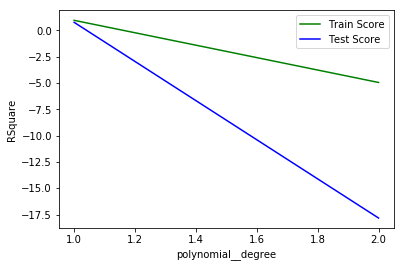

In [25]:
#Running the Polynomial regression model on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.pipeline import Pipeline
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
regressor = Pipeline([('polynomial', PolynomialFeatures(degree = 2)), ('linear', LinearRegression())])
k_range = range(1,3)
parameters = dict(polynomial__degree = k_range)
evalknnpol(regressor,3,parameters, 5, "r2")

### Evaluation Remarks for Polynomial Regression model
We ran the polynoial regression model for **degrre = 2**, but it is clearly visible from the above graph that the model gave very bad results in terms of R-square, suggesting that the polynomial regression may **NOT** be a good choice for the current dataset.  

## Ridge

Grid Search Took 6.07 seconds, The results of the grid search on the train set is as below


[0.95356427 0.95359487 0.95371464 0.95472018 0.95535501]


The mean of R2 value for alpha : 0.01 is 0.9535642703285979
The mean of R2 value for alpha : 0.1 is 0.9535948708794244
The mean of R2 value for alpha : 1 is 0.9537146385292176
The mean of R2 value for alpha : 10 is 0.9547201772742927
The mean of R2 value for alpha : 100 is 0.9553550117725512


Grid Search Took 5.31 seconds, The results of the grid search on the test set is as below


[0.76135181 0.7617115  0.7647693  0.772941   0.7766416 ]


The mean of R2 value for alpha : 0.01 is 0.7613518091795259
The mean of R2 value for alpha : 0.1 is 0.7617115026084341
The mean of R2 value for alpha : 1 is 0.7647692989946885
The mean of R2 value for alpha : 10 is 0.7729410047178022
The mean of R2 value for alpha : 100 is 0.7766415989236216


Graph Evaluation:


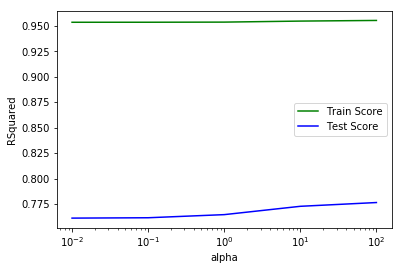

In [26]:
#Running the Ridge regression model on the training dataset split from the sample dataset by calling the evalridlas
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from  sklearn.linear_model import Ridge
regressor = Ridge()
parameters = dict(alpha = (0.01, 0.1, 1, 10, 100))
evalridlas(regressor,parameters, 5,5, "r2")

## Evaluation Remarks for Ridge Regression model:
Although the train scores appear to be good for the ridge regression model, there is quite a gap between the train scores and test scores. The best balance between the train and the test score is found to be for **alpha = 10** and we will choose this as the best parameter for this model. The corresponding R-square value for train and test data set is **.9547** and **.7729** respectively.

## Lasso

Grid Search Took 40.99 seconds, The results of the grid search on the train set is as below


[0.95457309 0.95500576 0.95509732 0.94387928 0.9169016 ]


The mean of R2 value for alpha : 0.01 is 0.9545730868058949
The mean of R2 value for alpha : 0.1 is 0.9550057647695563
The mean of R2 value for alpha : 1 is 0.9550973190629112
The mean of R2 value for alpha : 10 is 0.9438792829139868
The mean of R2 value for alpha : 100 is 0.9169015985874961


C:\Users\barun\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)




Grid Search Took 17.01 seconds, The results of the grid search on the test set is as below


[0.76476552 0.76811522 0.777987   0.77356577 0.76587256]


The mean of R2 value for alpha : 0.01 is 0.7647655237285389
The mean of R2 value for alpha : 0.1 is 0.7681152201116327
The mean of R2 value for alpha : 1 is 0.7779870047403117
The mean of R2 value for alpha : 10 is 0.7735657675943259
The mean of R2 value for alpha : 100 is 0.7658725590585862


Graph Evaluation:


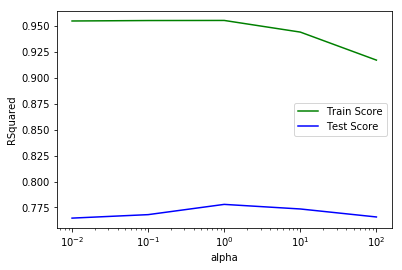

In [27]:
#Running the Lasso regression model on the training dataset split from the sample dataset by calling the evalridlas
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.linear_model import Lasso
regressor = Lasso()
parameters = dict(alpha = (0.01, 0.1, 1, 10, 100))
evalridlas(regressor,parameters, 5,5, "r2")

## Evaluation Remarks for Lasso Regression model:
Although the train scores appear to be good for the ridge regression model, there is quite a gap between the train scores and test scores. The best balance between the train and the test score is found to be for **alpha = 1** and we will choose this as the best parameter for this model. The corresponding R-square value for train and test data set is **.955** and **.778** respectively.

## Support Vector Regression With Linear Kernel

Grid Search Took 32937.65 seconds, The results of the grid search on the train set is as below
The mean of R2 value for C : 0.01 is 0.8495602397263018
The mean of R2 value for C : 0.1 is 0.9185060166769458
The mean of R2 value for C : 1 is 0.9495067618560648
The mean of R2 value for C : 10 is 0.9545158081664717
The mean of R2 value for C : 100 is 0.955061029153175


Grid Search Took 1863.71 seconds, The results of the grid search on the test set is as below
The mean of R2 value for C : 0.01 is 0.7899577523809175
The mean of R2 value for C : 0.1 is 0.8427758176237582
The mean of R2 value for C : 1 is 0.8825274626059931
The mean of R2 value for C : 10 is 0.8898877033558511
The mean of R2 value for C : 100 is 0.889947745528983


Graph Evaluation:


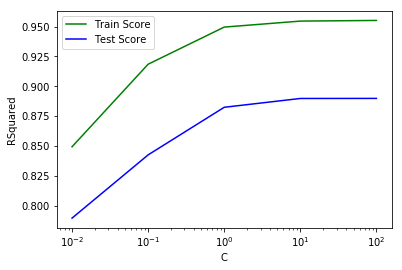

In [28]:
#Running the Support vector regression model with linear kernel on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C = 0.01)
parameters = dict(C = (0.01, 0.1, 1, 10, 100))
for i in parameters.keys():
    b = len(parameters[i])
evalsvmlin(regressor,parameters,b,5,"r2")

## Evaluation Remarks for SV Regression model with Linear Kernel :
Both train and test scores appear to be good for this model, but by looking at the graph we could conclude that the optimum value of **C** would be **10** and the respective values of R-square for train and test data set would be **0.9545** and **0.8898** respectively.


## Linear Support Vector Regression

Grid Search Took 3754.41 seconds, The results of the grid search on the train set is as below
The mean of R2 value for C : 0.01 is -0.05391885667178817
The mean of R2 value for C : 0.1 is 0.047190568164239624
The mean of R2 value for C : 1 is 0.16539159911731066
The mean of R2 value for C : 10 is 0.2614972571658671
The mean of R2 value for C : 100 is 0.3532507355727849


Grid Search Took 434.10 seconds, The results of the grid search on the test set is as below
The mean of R2 value for C : 0.01 is -0.06992686420158631
The mean of R2 value for C : 0.1 is -0.0183877994954
The mean of R2 value for C : 1 is 0.1366997919357217
The mean of R2 value for C : 10 is 0.25376273158152995
The mean of R2 value for C : 100 is 0.36589962132046244


Graph Evaluation:


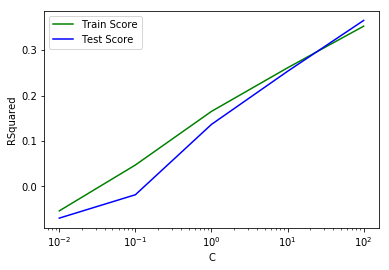

In [29]:
#Running the Linear support vector regression model on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.svm import LinearSVR
#SVR(C = 0.01, epsilon =0.1)
regressor = SVR(C = 0.01)
parameters = dict(C = (0.01, 0.1, 1, 10, 100))
for i in parameters.keys():
    b = len(parameters[i])
evalsvmlin(regressor,parameters,b,5,"r2")

## Evaluation Remarks for Linear Support Vector Regression Model:
The values of R-square for both train and test data appear to be pretty low for this model. From the graph,the best parameter is **C= 100** where the train and test scores are relatively higher and also close to each other. The train and test scores at C=100 are **0.3532** and **0.3658** respectively.

## Support Vector Regression with polynomial Kernel

Grid Search Took 6376.23 seconds, The results of the grid search on the train set is as below


[ 0.1213271  -0.15417369  0.73042951 -1.35059339  0.85762257 -2.36171611
  0.92444219 -1.21319902  0.95085119 -0.46871775]


Grid Search Took 612.96 seconds, The results of the grid search on the test set is as below


[-0.00854347  0.47397428  0.44082934  0.4853758   0.79875049  0.28498773
  0.84816597  0.48680356  0.88434471  0.85230785]


Graph Evaluation:


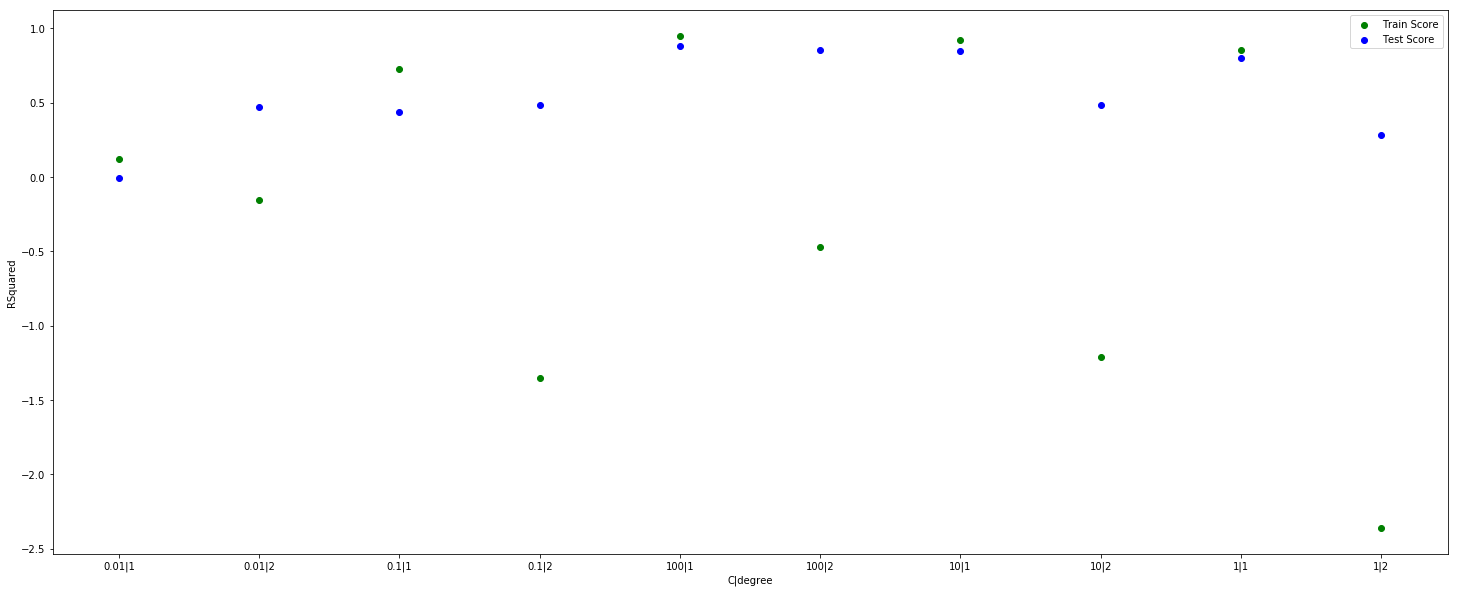

In [30]:
#Running the support vector regression model with polynomial kernel on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.svm import SVR
import functools
import operator
regressor = SVR(kernel = 'poly', C = 0.01, degree = 2)
parameters = dict(C = (0.01, 0.1, 1, 10, 100), degree = (1,2))
b =[]
for i, j in enumerate(parameters.keys()):
    #a = len(parameters[j])
    b.append(len(parameters[j]))  
c = functools.reduce(operator.mul,b,1)
evalsvmpolker(regressor,parameters,b,c,5,"r2")

## Evaluation Remarks for Support Vector Regression Model with poly kernel:
We could see that the performance of this model for degree = 1 is overall a lot better than degree = 2. The best parameter combination can be observed at **C =100 and degree =1**. The corresponding values of R-square for this combination is **0.8576 and 0.7987** for train and test dataset respectively.

## Support Vector Regression with rbf kernel

Grid Search Took 17728.31 seconds, The results of the grid search on the train set is as below


[-0.05295133 -0.05911382 -0.0562933  -0.06048727 -0.06600595  0.05872889
 -0.03737359 -0.04615184 -0.05245648 -0.06018497  0.1835593   0.01762783
 -0.02186044 -0.03834464 -0.05133682  0.27648782  0.11236007  0.04049801
 -0.01018201 -0.03808218  0.37471939  0.21005936  0.10620121  0.0198601
 -0.01540773]


Grid Search Took 1433.13 seconds, The results of the grid search on the test set is as below


[-0.06945133 -0.07148569 -0.06897492 -0.07149343 -0.07447796 -0.01418353
 -0.05547945 -0.05596923 -0.0613704  -0.06919534  0.15719902 -0.01751377
 -0.04250192 -0.05241375 -0.06221551  0.27266227  0.07632182  0.01074547
 -0.02560403 -0.04764191  0.38545487  0.19660368  0.08985004  0.00994741
 -0.01965474]


Graph Evaluation:


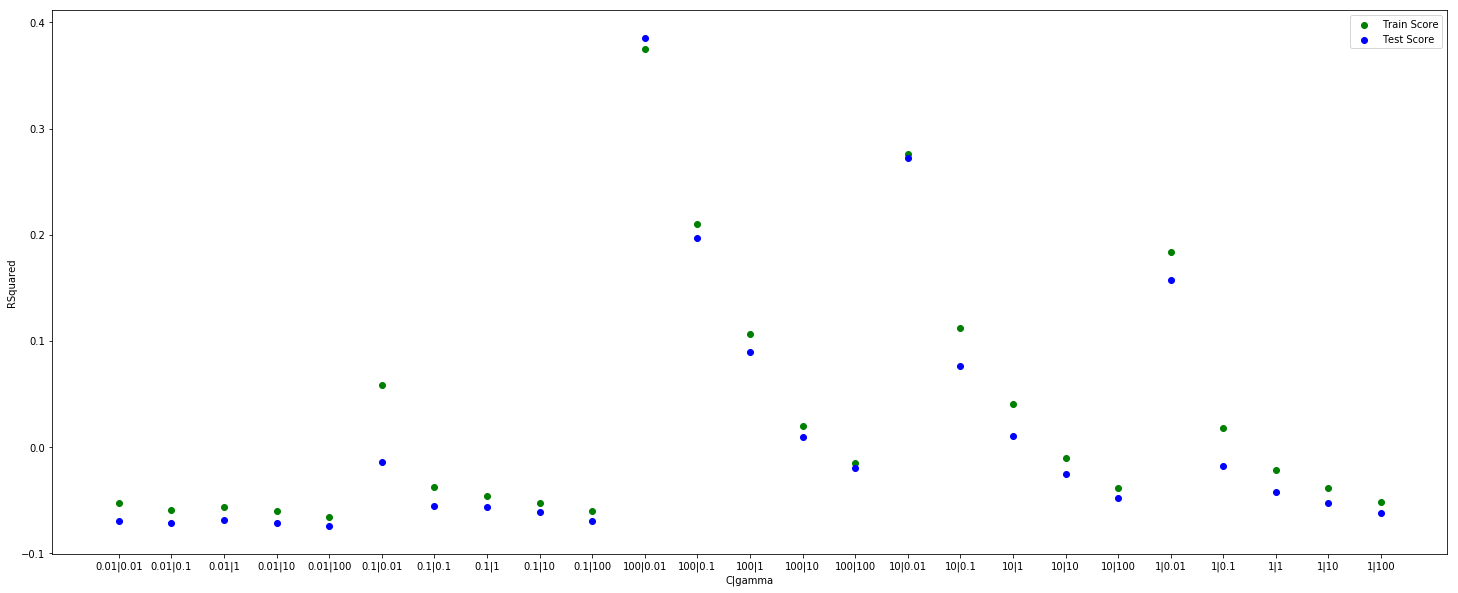

In [31]:
#Running the support vector regression model with rbf kernel on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.svm import SVR
import functools
import operator
regressor = SVR(kernel = 'rbf', C = 0.01, gamma = .01)
parameters = dict(C = (0.01, 0.1, 1, 10, 100), gamma = (0.01, 0.1, 1, 10, 100))
b =[]
for i, j in enumerate(parameters.keys()):
    b.append(len(parameters[j]))
c = functools.reduce(operator.mul,b,1)
evalsvmpolker(regressor,parameters,b,c,5,"r2")

## Evaluation Remarks for Support Vector Regression Model with rbf kernel:
We could see that the performance of this model appear to be doing worse than the other models for this data set. The best parameter combination is observerd to be **C = 100 and gamma = 0.01**. The corresponding R-square value for this combnination is **0.3747** and **0.3854** for train and test dataset respectively.

## Display the result summary table

In [7]:
report_data = [['Linear Regression','N/A','0.9609','0.7743'],['KNN','Degree:9','0.8662','0.7725'],['Polynomial','Degree:1', '0.9535','0.7614'],['Ridge','Alpha:10','0.9547','0.7729'],
               ['Lasso','Alpha:1','0.955','0.778'],['SVR- Linear Kernel','C:10','0.9545','0.8898'],['Linear SVR','C:100','0.3532','0.3658'],['SVR-Poly Kernel','Degree:1, C:100', '0.8576','0.7987'],['SVR-rbf Kernel','C:100, Gamma:0.01','0.3747','0.3854']]
report_table = pd.DataFrame(report_data, columns=['Algorithm','Best Parameter','R-Square-Train','R-Square-Test'])
report_table

,Algorithm,Best Parameter,R-Square-Train,R-Square-Test
0,Linear Regression,N/A,0.9609,0.7743
1,KNN,Degree:9,0.8662,0.7725
2,Polynomial,Degree:1,0.9535,0.7614
3,Ridge,Alpha:10,0.9547,0.7729
4,Lasso,Alpha:1,0.955,0.778
5,SVR- Linear Kernel,C:10,0.9545,0.8898
6,Linear SVR,C:100,0.3532,0.3658
7,SVR-Poly Kernel,"Degree:1, C:100",0.8576,0.7987
8,SVR-rbf Kernel,"C:100, Gamma:0.01",0.3747,0.3854


Above is the result summary table for all the models. The table clearly shows that the SVR with linear kernel is the best model for our dataset with hyperparameter C set to 10. The R-square value for train and test are **0.9545 and 0.8898**. Based on these results we choose this model to be best suited for our regression.

## Running the chosen SVR with linear kernel model on the whole dataset

In [45]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C = 10)
#parameters = dict(C = (0.01, 0.1, 1, 10, 100))
#for i in parameters.keys():
    #b = len(parameters[i])
parameters = {'C': [10]}
#evalsvmlin(regressor,parameters,b,5,"r2")

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
    
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = "r2",
                           cv = 5,
                           n_jobs = -1)
t0 = time.time()
grid_train = grid_search.fit(X, y.values.reshape((-1,)))
t1 = time.time()
print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
train_score = grid_train.cv_results_['mean_test_score']
print(train_score)